In [1]:
## Load Libraries

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import seaborn as sns

In [2]:
## Load the Dataset

df = pd.read_csv('D:\The Machine Learning Company\Repositories\ml_mastery\Data/iris.csv')

In [3]:
## Check the dataset

df.head()

,Unnamed: 0,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,0,5.1,3.5,1.4,0.2,0
1,1,4.9,3.0,1.4,0.2,0
2,2,4.7,3.2,1.3,0.2,0
3,3,4.6,3.1,1.5,0.2,0
4,4,5.0,3.6,1.4,0.2,0


In [4]:
## Dimensions of the data

df.shape

(150, 6)

In [5]:
## Peek the dataset

df.head(20)

,Unnamed: 0,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,0,5.1,3.5,1.4,0.2,0
1,1,4.9,3.0,1.4,0.2,0
2,2,4.7,3.2,1.3,0.2,0
3,3,4.6,3.1,1.5,0.2,0
4,4,5.0,3.6,1.4,0.2,0
5,5,5.4,3.9,1.7,0.4,0
6,6,4.6,3.4,1.4,0.3,0
7,7,5.0,3.4,1.5,0.2,0
8,8,4.4,2.9,1.4,0.2,0
9,9,4.9,3.1,1.5,0.1,0


In [6]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Statistical Summary

In [7]:
## Description of the Dataset

df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [8]:
## Target Distribution

df['Target'].value_counts()

0    50
1    50
2    50
Name: Target, dtype: int64

In [9]:
## drop Unnamed column

df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'Target'],
      dtype='object')

### Data Visualization

### UniVariate Analysis

In [10]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 12

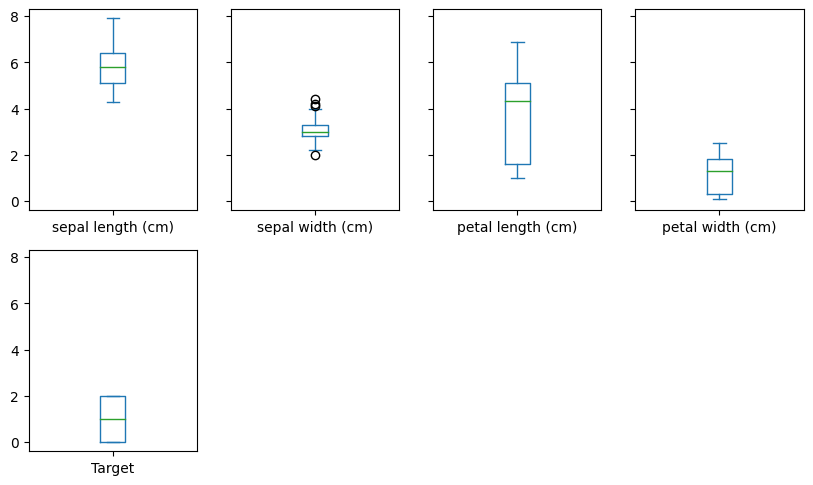

In [11]:
## Box and Whisker Plot

df.plot(kind='box', subplots=True, layout=(4, 4), sharex=False, sharey=True)
plt.show();

Not clear references

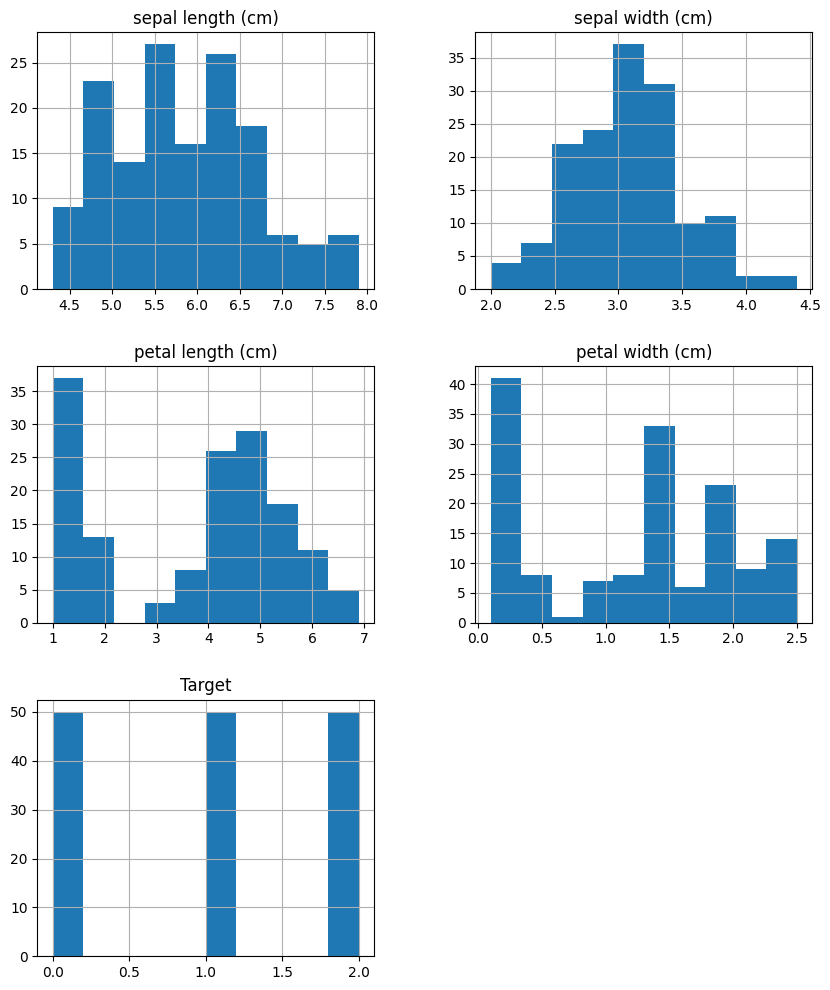

In [12]:
## Histogram 

df.hist()
plt.show();

### MultiVariate Analysis

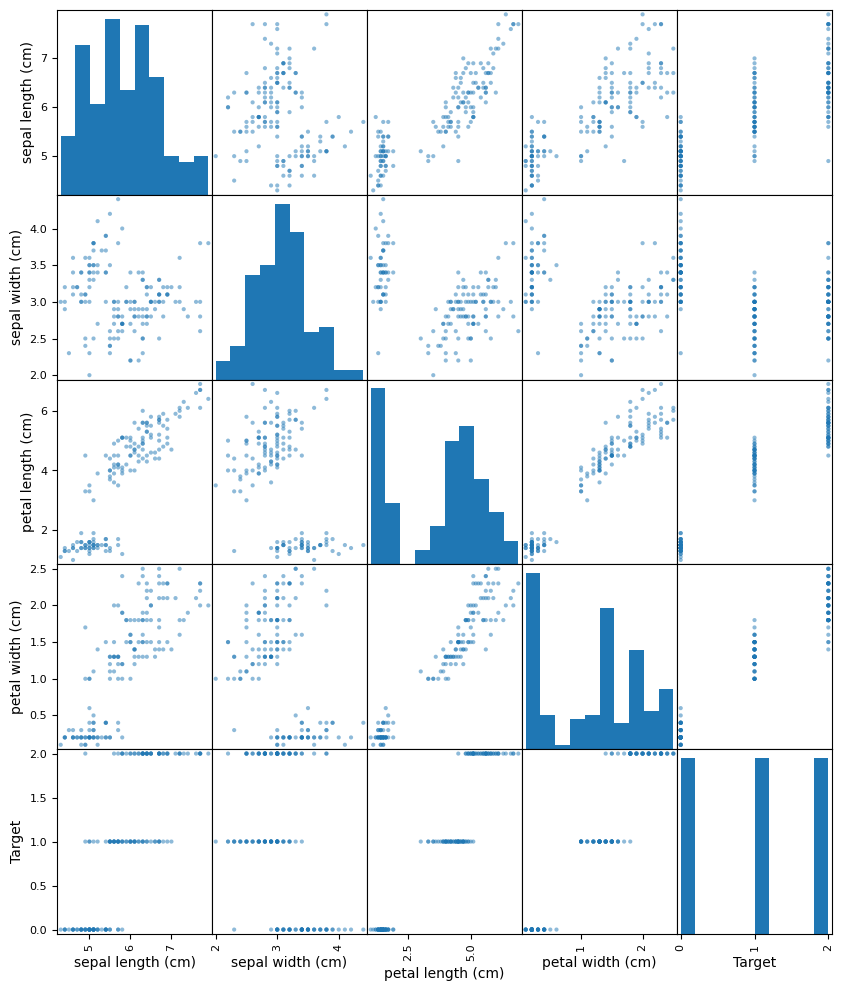

In [13]:
pd.plotting.scatter_matrix(df)
plt.show();

In [14]:
## Split-out the validation dataset

array = df.values

In [15]:
X = array[:, 0:4]
y = array[:, 4]

In [16]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [17]:
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [18]:
validation_size = 0.20
seed = 7

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=validation_size, random_state=seed)

### Build Models

In [20]:
## Spot Check Algorithms

models = []
models.append(("Logistic Regression", LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("Decision Tree", DecisionTreeClassifier()))
models.append(("Naive Bayes", GaussianNB()))
models.append(("SVM", SVC()))

In [21]:
## Evaluate each model in turn 

results = []
names = []
scoring = "accuracy"
for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = (name, cv_results.mean(), cv_results.std())
    print(msg)

('Logistic Regression', 0.9466666666666667, 0.0581186525805423)
('LDA', 0.9666666666666668, 0.061463629715285906)
('KNN', 0.9333333333333333, 0.08432740427115676)
('Decision Tree', 0.96, 0.05333333333333332)
('Naive Bayes', 0.9466666666666667, 0.0581186525805423)
('SVM', 0.9333333333333333, 0.07302967433402213)


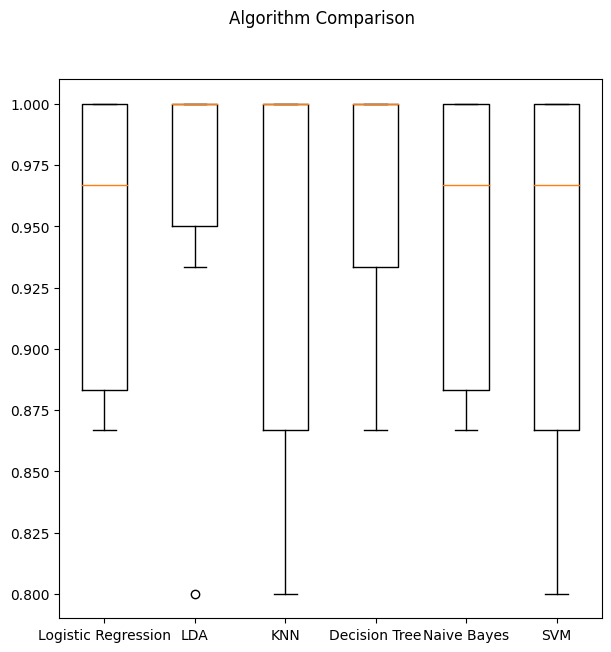

In [22]:
## Compare Algorithms

fig = plt.figure(figsize=(7, 7))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show();

### Make Predictions

In [23]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [24]:
## Accuracy Score 

print("Accuracy Score :", accuracy_score(y_test, y_pred))

Accuracy Score : 0.9


In [25]:
## Confusion Matrix

print("Confusion Matrix :", confusion_matrix(y_test, y_pred))

Confusion Matrix : [[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]


In [26]:
## Classification Report

print("Classification Report :", classification_report(y_test, y_pred))

Classification Report :               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         7
         1.0       0.85      0.92      0.88        12
         2.0       0.90      0.82      0.86        11

    accuracy                           0.90        30
   macro avg       0.92      0.91      0.91        30
weighted avg       0.90      0.90      0.90        30

